In [1]:
getwd()

[1] "/panfs/cmb-panasas2/amalthom/work_staging/species_analysis"

In [108]:
library(limma)
library(data.table)

# find all way hc one to one ortholog

In [59]:
orthopath="/home/rcf-40/amalthom/panfs/software/genomes/orthology_ensembl94/one2one_hc"
species = c("cjacchus","hsapiens","mmulatta","mmusculus","ocuniculus","rnorvegicus")
species.full = c("Callithrix_jacchus","Homo_sapiens","Macaca_mulatta",
                 "Mus_musculus","Oryctolagus_cuniculus","Rattus_norvegicus")


In [46]:
l = list()
ensembl_unique = vector()
for(s in species){
   if(s == "hsapiens") next
    print(s)
 df = read.table(paste0(orthopath,"/hsapiens-vs-",s,"_one2one_hc.tsv"),
                       sep="\t",header=T,stringsAsFactors = F)
head(df)
l[[s]] = df$ensembl_gene_id
ensembl_unique = c(ensembl_unique,as.vector(df$ensembl_gene_id))    
}
ensembl_unique = unique(ensembl_unique)

[1] "cjacchus"
[1] "mmulatta"
[1] "mmusculus"
[1] "ocuniculus"
[1] "rnorvegicus"


In [25]:
sapply(l,length)

cjacchus    mmulatta   mmusculus  ocuniculus rnorvegicus 
      17895       18952       15519       13359       14387

In [26]:
sum(sapply(l,length))
length(ensembl_unique)

[1] 80112

[1] 21773

In [32]:
overlap = as.data.frame(sapply(l,function(x) as.integer(ensembl_unique %in% unlist(x))))
row.names(overlap) = ensembl_unique                               
head(overlap)

,cjacchus,mmulatta,mmusculus,ocuniculus,rnorvegicus
ENSG00000088766,1,1,1,1,1
ENSG00000086475,1,0,1,1,1
ENSG00000174327,1,0,1,1,1
ENSG00000173597,1,1,1,0,1
ENSG00000010319,1,1,1,1,1
ENSG00000188338,1,1,1,1,1


In [33]:
commongenes = ensembl_unique[rowSums(overlap) == ncol(overlap)]
length(commongenes)

[1] 9529

In [35]:
distribution = vennCounts(as.data.frame(overlap))
distribution

   cjacchus mmulatta mmusculus ocuniculus rnorvegicus Counts
1         0        0         0          0           0      0
2         0        0         0          0           1     23
3         0        0         0          1           0     57
4         0        0         0          1           1     18
5         0        0         1          0           0     86
6         0        0         1          0           1    127
7         0        0         1          1           0     57
8         0        0         1          1           1    141
9         0        1         0          0           0   2211
10        0        1         0          0           1     36
11        0        1         0          1           0     95
12        0        1         0          1           1     36
13        0        1         1          0           0     98
14        0        1         1          0           1    264
15        0        1         1          1           0     93
16        0        1    

In [39]:
paste(species,collapse="-")

[1] "cjacchus-mmulatta-mmusculus-ocuniculus-rnorvegicus"

In [41]:
outputdir="carelli2018_analysis"
write.table(as.data.frame(commongenes),
            file=paste0(outputdir,"/common_orthologousgenes_human-",paste(species,collapse="-"),".txt"),
           quote=F,row.names=F)

In [57]:
outputdir="carelli2018_analysis"

# subset countstable based on allway orthologs

In [42]:
counts_path = "/home/rcf-40/amalthom/staging_work/rnaseq/carelli2018/countstables/"

In [101]:
counts_list = list()
for(i in 1:length(species.full)){
    print(species.full[i])
    if(species.full[i] == "Homo_sapiens"){
       
       df = read.table(paste0(counts_path,"RNAseq_carelli2018_",species.full[i],".tsv"),sep="\t",header=T,row.names=1)
       df = df[commongenes,]
       write.table(df,paste0(outputdir,"/counts_",species.full[i],".tsv"),sep="\t",quote=F,col.names=NA)
        print(dim(df))
        counts_list[[species.full[i]]] = df
    }else{
         df = read.table(paste0(orthopath,"/hsapiens-vs-",species[i],"_one2one_hc.tsv"),
                       sep="\t",header=T,stringsAsFactors = F)
        df = df[match(commongenes,df$ensembl_gene_id),]
        
        t = read.table(paste0(counts_path,"RNAseq_carelli2018_",species.full[i],".tsv"),sep="\t",header=T,row.names=1)
        t = t[df[,3],]
        print(dim(t))
        row.names(t) = commongenes
        write.table(t,paste0(outputdir,"/counts_",species.full[i],".tsv"),sep="\t",quote=F,col.names=NA)
        counts_list[[species.full[i]]] = t

    }
}

combined_df =  do.call(cbind,counts_list)

[1] "Callithrix_jacchus"
[1] 9529   12
[1] "Homo_sapiens"
[1] 9529   13
[1] "Macaca_mulatta"
[1] 9529   13
[1] "Mus_musculus"
[1] 9529    9
[1] "Oryctolagus_cuniculus"
[1] 9529   15
[1] "Rattus_norvegicus"
[1] 9529   16


In [103]:
dim(combined_df)

[1] 9529   78

In [104]:
colnames(combined_df)

[1] "Callithrix_jacchus.SRR7134951"    "Callithrix_jacchus.SRR7134952"   
 [3] "Callithrix_jacchus.SRR7134953"    "Callithrix_jacchus.SRR7134954"   
 [5] "Callithrix_jacchus.SRR7134955"    "Callithrix_jacchus.SRR7134956"   
 [7] "Callithrix_jacchus.SRR7134957"    "Callithrix_jacchus.SRR7134958"   
 [9] "Callithrix_jacchus.SRR7134959"    "Callithrix_jacchus.SRR7134960"   
[11] "Callithrix_jacchus.SRR7134961"    "Callithrix_jacchus.SRR7134962"   
[13] "Homo_sapiens.SRR7134925"          "Homo_sapiens.SRR7134926"         
[15] "Homo_sapiens.SRR7134927"          "Homo_sapiens.SRR7134928"         
[17] "Homo_sapiens.SRR7134929"          "Homo_sapiens.SRR7134930"         
[19] "Homo_sapiens.SRR7134931"          "Homo_sapiens.SRR7134932"         
[21] "Homo_sapiens.SRR7134933"          "Homo_sapiens.SRR7134934"         
[23] "Homo_sapiens.SRR7134935"          "Homo_sapiens.SRR7134936"         
[25] "Homo_sapiens.SRR7134937"          "Macaca_mulatta.SRR7134938"       
[27] "Macaca_mulatta.SRR7134939"        "Macaca_mulatta.SRR7134940"       
[29] "Macaca_mulatta.SRR7134941"        "Macaca_mulatta.SRR7134942"       
[31] "Macaca_mulatta.SRR7134943"        "Macaca_mulatta.SRR7134944"       
[33] "Macaca_mulatta.SRR7134945"        "Macaca_mulatta.SRR7134946"       
[35] "Macaca_mulatta.SRR7134947"        "Macaca_mulatta.SRR7134948"       
[37] "Macaca_mulatta.SRR7134949"        "Macaca_mulatta.SRR7134950"       
[39] "Mus_musculus.SRR7134963"          "Mus_musculus.SRR7134964"         
[41] "Mus_musculus.SRR7134965"          "Mus_musculus.SRR7134966"         
[43] "Mus_musculus.SRR7134967"          "Mus_musculus.SRR7134968"         
[45] "Mus_musculus.SRR7134969"          "Mus_musculus.SRR7134970"         
[47] "Mus_musculus.SRR7134971"          "Oryctolagus_cuniculus.SRR7134988"
[49] "Oryctolagus_cuniculus.SRR7134989" "Oryctolagus_cuniculus.SRR7134990"
[51] "Oryctolagus_cuniculus.SRR7134991" "Oryctolagus_cuniculus.SRR7134992"
[53] "Oryctolagus_cuniculus.SRR7134993" "Oryctolagus_cuniculus.SRR7134994"
[55] "Oryctolagus_cuniculus.SRR7134995" "Oryctolagus_cuniculus.SRR7134996"
[57] "Oryctolagus_cuniculus.SRR7134997" "Oryctolagus_cuniculus.SRR7134998"
[59] "Oryctolagus_cuniculus.SRR7134999" "Oryctolagus_cuniculus.SRR7135000"
[61] "Oryctolagus_cuniculus.SRR7135001" "Oryctolagus_cuniculus.SRR7135002"
[63] "Rattus_norvegicus.SRR7134972"     "Rattus_norvegicus.SRR7134973"    
[65] "Rattus_norvegicus.SRR7134974"     "Rattus_norvegicus.SRR7134975"    
[67] "Rattus_norvegicus.SRR7134976"     "Rattus_norvegicus.SRR7134977"    
[69] "Rattus_norvegicus.SRR7134978"     "Rattus_norvegicus.SRR7134979"    
[71] "Rattus_norvegicus.SRR7134980"     "Rattus_norvegicus.SRR7134981"    
[73] "Rattus_norvegicus.SRR7134982"     "Rattus_norvegicus.SRR7134983"    
[75] "Rattus_norvegicus.SRR7134984"     "Rattus_norvegicus.SRR7134985"    
[77] "Rattus_norvegicus.SRR7134986"     "Rattus_norvegicus.SRR7134987"

In [106]:
write.table(combined_df,file = paste0(outputdir,"/allwayortholgous_counts.tsv"),sep="\t",quote = F,col.names = NA)

# manipulating columns of combined df

In [107]:
colnames(combined_df)

[1] "Callithrix_jacchus.SRR7134951"    "Callithrix_jacchus.SRR7134952"   
 [3] "Callithrix_jacchus.SRR7134953"    "Callithrix_jacchus.SRR7134954"   
 [5] "Callithrix_jacchus.SRR7134955"    "Callithrix_jacchus.SRR7134956"   
 [7] "Callithrix_jacchus.SRR7134957"    "Callithrix_jacchus.SRR7134958"   
 [9] "Callithrix_jacchus.SRR7134959"    "Callithrix_jacchus.SRR7134960"   
[11] "Callithrix_jacchus.SRR7134961"    "Callithrix_jacchus.SRR7134962"   
[13] "Homo_sapiens.SRR7134925"          "Homo_sapiens.SRR7134926"         
[15] "Homo_sapiens.SRR7134927"          "Homo_sapiens.SRR7134928"         
[17] "Homo_sapiens.SRR7134929"          "Homo_sapiens.SRR7134930"         
[19] "Homo_sapiens.SRR7134931"          "Homo_sapiens.SRR7134932"         
[21] "Homo_sapiens.SRR7134933"          "Homo_sapiens.SRR7134934"         
[23] "Homo_sapiens.SRR7134935"          "Homo_sapiens.SRR7134936"         
[25] "Homo_sapiens.SRR7134937"          "Macaca_mulatta.SRR7134938"       
[27] "Macaca_mulatta.SRR7134939"        "Macaca_mulatta.SRR7134940"       
[29] "Macaca_mulatta.SRR7134941"        "Macaca_mulatta.SRR7134942"       
[31] "Macaca_mulatta.SRR7134943"        "Macaca_mulatta.SRR7134944"       
[33] "Macaca_mulatta.SRR7134945"        "Macaca_mulatta.SRR7134946"       
[35] "Macaca_mulatta.SRR7134947"        "Macaca_mulatta.SRR7134948"       
[37] "Macaca_mulatta.SRR7134949"        "Macaca_mulatta.SRR7134950"       
[39] "Mus_musculus.SRR7134963"          "Mus_musculus.SRR7134964"         
[41] "Mus_musculus.SRR7134965"          "Mus_musculus.SRR7134966"         
[43] "Mus_musculus.SRR7134967"          "Mus_musculus.SRR7134968"         
[45] "Mus_musculus.SRR7134969"          "Mus_musculus.SRR7134970"         
[47] "Mus_musculus.SRR7134971"          "Oryctolagus_cuniculus.SRR7134988"
[49] "Oryctolagus_cuniculus.SRR7134989" "Oryctolagus_cuniculus.SRR7134990"
[51] "Oryctolagus_cuniculus.SRR7134991" "Oryctolagus_cuniculus.SRR7134992"
[53] "Oryctolagus_cuniculus.SRR7134993" "Oryctolagus_cuniculus.SRR7134994"
[55] "Oryctolagus_cuniculus.SRR7134995" "Oryctolagus_cuniculus.SRR7134996"
[57] "Oryctolagus_cuniculus.SRR7134997" "Oryctolagus_cuniculus.SRR7134998"
[59] "Oryctolagus_cuniculus.SRR7134999" "Oryctolagus_cuniculus.SRR7135000"
[61] "Oryctolagus_cuniculus.SRR7135001" "Oryctolagus_cuniculus.SRR7135002"
[63] "Rattus_norvegicus.SRR7134972"     "Rattus_norvegicus.SRR7134973"    
[65] "Rattus_norvegicus.SRR7134974"     "Rattus_norvegicus.SRR7134975"    
[67] "Rattus_norvegicus.SRR7134976"     "Rattus_norvegicus.SRR7134977"    
[69] "Rattus_norvegicus.SRR7134978"     "Rattus_norvegicus.SRR7134979"    
[71] "Rattus_norvegicus.SRR7134980"     "Rattus_norvegicus.SRR7134981"    
[73] "Rattus_norvegicus.SRR7134982"     "Rattus_norvegicus.SRR7134983"    
[75] "Rattus_norvegicus.SRR7134984"     "Rattus_norvegicus.SRR7134985"    
[77] "Rattus_norvegicus.SRR7134986"     "Rattus_norvegicus.SRR7134987"

In [109]:
?tstrsplit

In [117]:
tstrsplit(colnames(combined_df),"\\.")[[2]]

[1] "SRR7134951" "SRR7134952" "SRR7134953" "SRR7134954" "SRR7134955"
 [6] "SRR7134956" "SRR7134957" "SRR7134958" "SRR7134959" "SRR7134960"
[11] "SRR7134961" "SRR7134962" "SRR7134925" "SRR7134926" "SRR7134927"
[16] "SRR7134928" "SRR7134929" "SRR7134930" "SRR7134931" "SRR7134932"
[21] "SRR7134933" "SRR7134934" "SRR7134935" "SRR7134936" "SRR7134937"
[26] "SRR7134938" "SRR7134939" "SRR7134940" "SRR7134941" "SRR7134942"
[31] "SRR7134943" "SRR7134944" "SRR7134945" "SRR7134946" "SRR7134947"
[36] "SRR7134948" "SRR7134949" "SRR7134950" "SRR7134963" "SRR7134964"
[41] "SRR7134965" "SRR7134966" "SRR7134967" "SRR7134968" "SRR7134969"
[46] "SRR7134970" "SRR7134971" "SRR7134988" "SRR7134989" "SRR7134990"
[51] "SRR7134991" "SRR7134992" "SRR7134993" "SRR7134994" "SRR7134995"
[56] "SRR7134996" "SRR7134997" "SRR7134998" "SRR7134999" "SRR7135000"
[61] "SRR7135001" "SRR7135002" "SRR7134972" "SRR7134973" "SRR7134974"
[66] "SRR7134975" "SRR7134976" "SRR7134977" "SRR7134978" "SRR7134979"
[71] "SRR7134980" "SRR7134981" "SRR7134982" "SRR7134983" "SRR7134984"
[76] "SRR7134985" "SRR7134986" "SRR7134987"

In [118]:
combined_df[1:3,1:3]

,Callithrix_jacchus.SRR7134951,Callithrix_jacchus.SRR7134952,Callithrix_jacchus.SRR7134953
ENSG00000088766,189,110,293
ENSG00000010319,51,135,310
ENSG00000188338,831,1550,1390


In [120]:
colnames(combined_df) = tstrsplit(colnames(combined_df),"\\.")[[2]]
combined_df[1:3,1:3]

,SRR7134951,SRR7134952,SRR7134953
ENSG00000088766,189,110,293
ENSG00000010319,51,135,310
ENSG00000188338,831,1550,1390


# change colnames

In [119]:
cinfo = "/panfs/cmb-panasas2/amalthom/work_staging/species_analysis/carelli2018_analysis/carelli2018_srpinfo.tsv"
cnames = read.table(cinfo, sep="\t",header=T)
head(cnames)

srr,srr_title
SRR7134943,SRR7134943_macaque_heart
SRR7134944,SRR7134944_macaque_kidney
SRR7134945,SRR7134945_macaque_kidney
SRR7134946,SRR7134946_macaque_kidney
SRR7134947,SRR7134947_macaque_liver
SRR7134948,SRR7134948_macaque_liver


In [125]:
newcolnames_df = cnames[match(colnames(combined_df),cnames$srr),]
summary(newcolnames_df$srr==colnames(combined_df))
head(newcolnames_df)

   Mode    TRUE 
logical      78 

,srr,srr_title
9,SRR7134951,SRR7134951_marmoset_brain
10,SRR7134952,SRR7134952_marmoset_brain
11,SRR7134953,SRR7134953_marmoset_brain
12,SRR7134954,SRR7134954_marmoset_heart
13,SRR7134955,SRR7134955_marmoset_heart
14,SRR7134956,SRR7134956_marmoset_heart


In [127]:
species = tstrsplit(newcolnames_df$srr_title,"_")[[2]]
head(species)
organ = tstrsplit(newcolnames_df$srr_title,"_")[[3]]
head(organ)

[1] "marmoset" "marmoset" "marmoset" "marmoset" "marmoset" "marmoset"

[1] "brain" "brain" "brain" "heart" "heart" "heart"

In [128]:
newcolnames_df$species = species
newcolnames_df$organ = organ
head(newcolnames_df)

,srr,srr_title,species,organ
9,SRR7134951,SRR7134951_marmoset_brain,marmoset,brain
10,SRR7134952,SRR7134952_marmoset_brain,marmoset,brain
11,SRR7134953,SRR7134953_marmoset_brain,marmoset,brain
12,SRR7134954,SRR7134954_marmoset_heart,marmoset,heart
13,SRR7134955,SRR7134955_marmoset_heart,marmoset,heart
14,SRR7134956,SRR7134956_marmoset_heart,marmoset,heart


In [131]:
write.table(newcolnames_df,file=paste0(outputdir,"/carelli2018_srpinfo_withmeta.tsv"),
            sep="\t",row.names = F,quote=F)

In [133]:
colnames(combined_df) = newcolnames_df$srr_title
combined_df[1:3,1:3]

,SRR7134951_marmoset_brain,SRR7134952_marmoset_brain,SRR7134953_marmoset_brain
ENSG00000088766,189,110,293
ENSG00000010319,51,135,310
ENSG00000188338,831,1550,1390


In [134]:
colnames(combined_df)

[1] "SRR7134951_marmoset_brain"  "SRR7134952_marmoset_brain" 
 [3] "SRR7134953_marmoset_brain"  "SRR7134954_marmoset_heart" 
 [5] "SRR7134955_marmoset_heart"  "SRR7134956_marmoset_heart" 
 [7] "SRR7134957_marmoset_kidney" "SRR7134958_marmoset_kidney"
 [9] "SRR7134959_marmoset_kidney" "SRR7134960_marmoset_liver" 
[11] "SRR7134961_marmoset_liver"  "SRR7134962_marmoset_liver" 
[13] "SRR7134925_human_brain"     "SRR7134926_human_brain"    
[15] "SRR7134927_human_brain"     "SRR7134928_human_brain"    
[17] "SRR7134929_human_heart"     "SRR7134930_human_heart"    
[19] "SRR7134931_human_heart"     "SRR7134932_human_heart"    
[21] "SRR7134933_human_kidney"    "SRR7134934_human_kidney"   
[23] "SRR7134935_human_liver"     "SRR7134936_human_liver"    
[25] "SRR7134937_human_liver"     "SRR7134938_macaque_brain"  
[27] "SRR7134939_macaque_brain"   "SRR7134940_macaque_brain"  
[29] "SRR7134941_macaque_heart"   "SRR7134942_macaque_heart"  
[31] "SRR7134943_macaque_heart"   "SRR7134944_macaque_kidney" 
[33] "SRR7134945_macaque_kidney"  "SRR7134946_macaque_kidney" 
[35] "SRR7134947_macaque_liver"   "SRR7134948_macaque_liver"  
[37] "SRR7134949_macaque_liver"   "SRR7134950_macaque_liver"  
[39] "SRR7134963_mouse_brain"     "SRR7134964_mouse_brain"    
[41] "SRR7134965_mouse_heart"     "SRR7134966_mouse_heart"    
[43] "SRR7134967_mouse_kidney"    "SRR7134968_mouse_kidney"   
[45] "SRR7134969_mouse_kidney"    "SRR7134970_mouse_liver"    
[47] "SRR7134971_mouse_liver"     "SRR7134988_rabbit_brain"   
[49] "SRR7134989_rabbit_brain"    "SRR7134990_rabbit_brain"   
[51] "SRR7134991_rabbit_brain"    "SRR7134992_rabbit_heart"   
[53] "SRR7134993_rabbit_heart"    "SRR7134994_rabbit_heart"   
[55] "SRR7134995_rabbit_kidney"   "SRR7134996_rabbit_kidney"  
[57] "SRR7134997_rabbit_kidney"   "SRR7134998_rabbit_kidney"  
[59] "SRR7134999_rabbit_liver"    "SRR7135000_rabbit_liver"   
[61] "SRR7135001_rabbit_liver"    "SRR7135002_rabbit_liver"   
[63] "SRR7134972_rat_brain"       "SRR7134973_rat_brain"      
[65] "SRR7134974_rat_brain"       "SRR7134975_rat_brain"      
[67] "SRR7134976_rat_heart"       "SRR7134977_rat_heart"      
[69] "SRR7134978_rat_heart"       "SRR7134979_rat_heart"      
[71] "SRR7134980_rat_kidney"      "SRR7134981_rat_kidney"     
[73] "SRR7134982_rat_kidney"      "SRR7134983_rat_kidney"     
[75] "SRR7134984_rat_liver"       "SRR7134985_rat_liver"      
[77] "SRR7134986_rat_liver"       "SRR7134987_rat_liver"

# CCA analysis using CCA package

In [135]:
suppressPackageStartupMessages({
    library(CCA)
    library(ggplot2)
})

## CCA between human & mouse

In [136]:
colnames(combined_df)[grepl("human",colnames(combined_df))|
                       grepl("mouse",colnames(combined_df))]

[1] "SRR7134925_human_brain"  "SRR7134926_human_brain" 
 [3] "SRR7134927_human_brain"  "SRR7134928_human_brain" 
 [5] "SRR7134929_human_heart"  "SRR7134930_human_heart" 
 [7] "SRR7134931_human_heart"  "SRR7134932_human_heart" 
 [9] "SRR7134933_human_kidney" "SRR7134934_human_kidney"
[11] "SRR7134935_human_liver"  "SRR7134936_human_liver" 
[13] "SRR7134937_human_liver"  "SRR7134963_mouse_brain" 
[15] "SRR7134964_mouse_brain"  "SRR7134965_mouse_heart" 
[17] "SRR7134966_mouse_heart"  "SRR7134967_mouse_kidney"
[19] "SRR7134968_mouse_kidney" "SRR7134969_mouse_kidney"
[21] "SRR7134970_mouse_liver"  "SRR7134971_mouse_liver"

In [138]:
dim(combined_df)
s1 = "human"
s2 = "mouse"
df_s1 = combined_df[,grepl(s1,colnames(combined_df))]
df_s2 = combined_df[,grepl(s2,colnames(combined_df))]
dim(df_s1)
dim(df_s2)

[1] 9529   78

[1] 9529   13

[1] 9529    9

In [139]:
cc1 = cc(df_s1,df_s2)

In [140]:
cc1$cor

[1] 0.99274648 0.86485864 0.83174732 0.54613475 0.49994355 0.32181729 0.30569393
[8] 0.11382754 0.02547583

In [144]:
cc1$xcoef

SRR7134925_human_brain,-5.595696e-08,3.378091e-05,-9.239029e-06,8.063880e-05,-1.191331e-04,-5.627168e-05,6.770925e-05,4.425615e-05,-3.366739e-04
SRR7134926_human_brain,-4.429545e-06,8.390136e-05,1.812443e-05,1.258482e-05,1.393966e-05,-7.649759e-05,1.041662e-04,-1.388034e-04,3.516160e-05
SRR7134927_human_brain,4.726533e-08,1.397576e-04,3.920281e-05,-1.582187e-04,5.511771e-04,1.955352e-04,-1.280258e-04,2.681523e-04,-6.366609e-04
SRR7134928_human_brain,3.973643e-06,9.711426e-05,4.877448e-05,3.519444e-05,-1.356908e-04,1.999878e-04,-4.178540e-04,2.340954e-04,1.376934e-03
SRR7134929_human_heart,-2.722674e-06,-6.808992e-05,3.084855e-04,2.634412e-05,4.280273e-06,-1.892537e-04,-2.120971e-04,-1.263234e-04,1.247998e-04
SRR7134930_human_heart,3.465584e-07,-2.707369e-05,5.336563e-05,1.343461e-05,-6.533386e-06,1.270216e-04,1.464751e-04,6.046555e-05,-8.432714e-05
SRR7134931_human_heart,1.411478e-07,1.431898e-05,-5.681893e-05,-4.992351e-06,1.748058e-06,-6.223327e-06,-3.310245e-06,6.519917e-06,6.331693e-05
SRR7134932_human_heart,-1.327662e-07,7.109912e-07,-1.719763e-06,-6.582675e-07,3.440964e-06,-4.116282e-05,-6.552979e-05,1.289831e-05,-1.132689e-05
SRR7134933_human_kidney,1.331663e-06,-3.082835e-06,-4.806580e-06,-9.692367e-05,-3.414899e-05,5.550002e-05,1.219539e-06,3.093755e-04,7.814072e-05
SRR7134934_human_kidney,-3.525508e-06,2.033353e-06,1.032989e-05,-2.339460e-04,-1.172773e-04,-2.138169e-04,1.331754e-04,-3.724978e-04,-1.365683e-04
SRR7134935_human_liver,-5.655577e-05,-1.691186e-05,5.636891e-06,-5.084743e-04,-4.467799e-04,1.601745e-03,-1.060869e-03,-5.300434e-04,-2.081554e-04


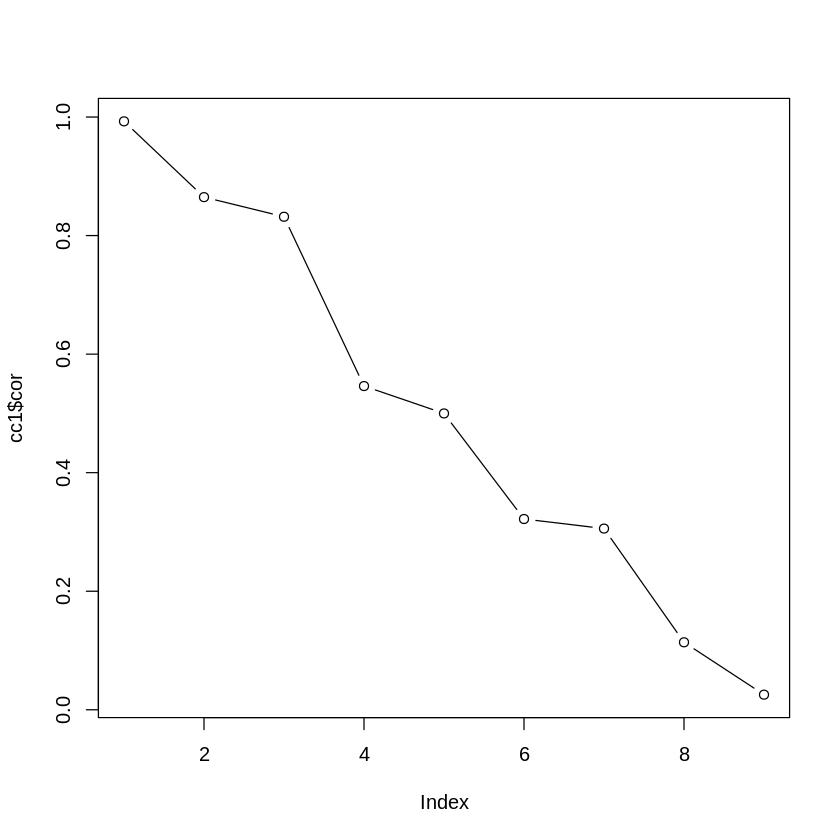

In [146]:
res.cc = cc1
plot(cc1$cor,type="b")

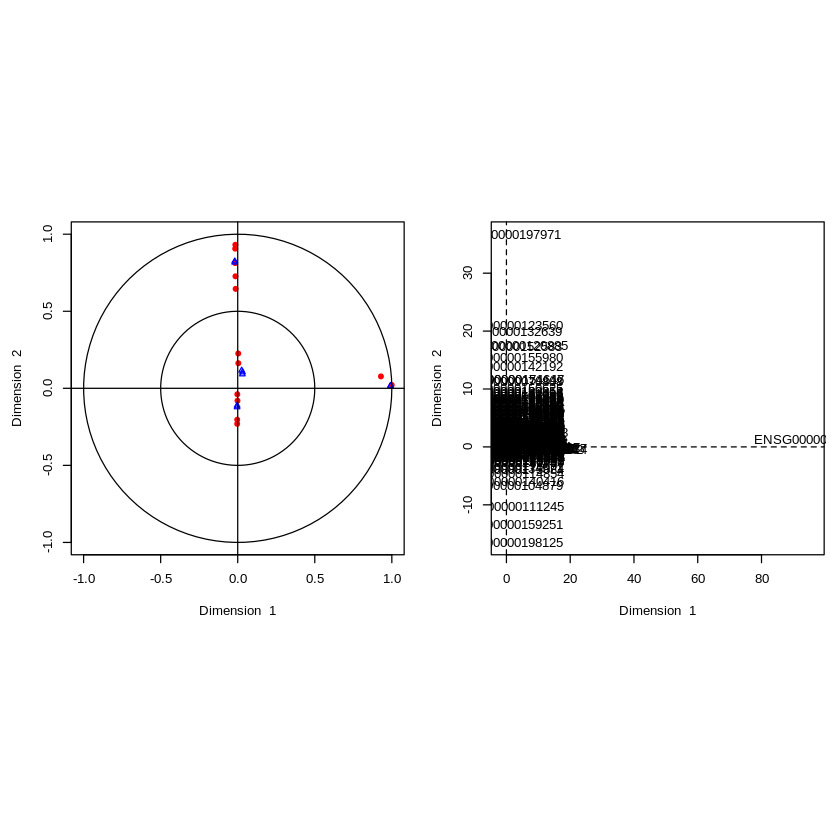

In [161]:
plt.cc(res.cc)

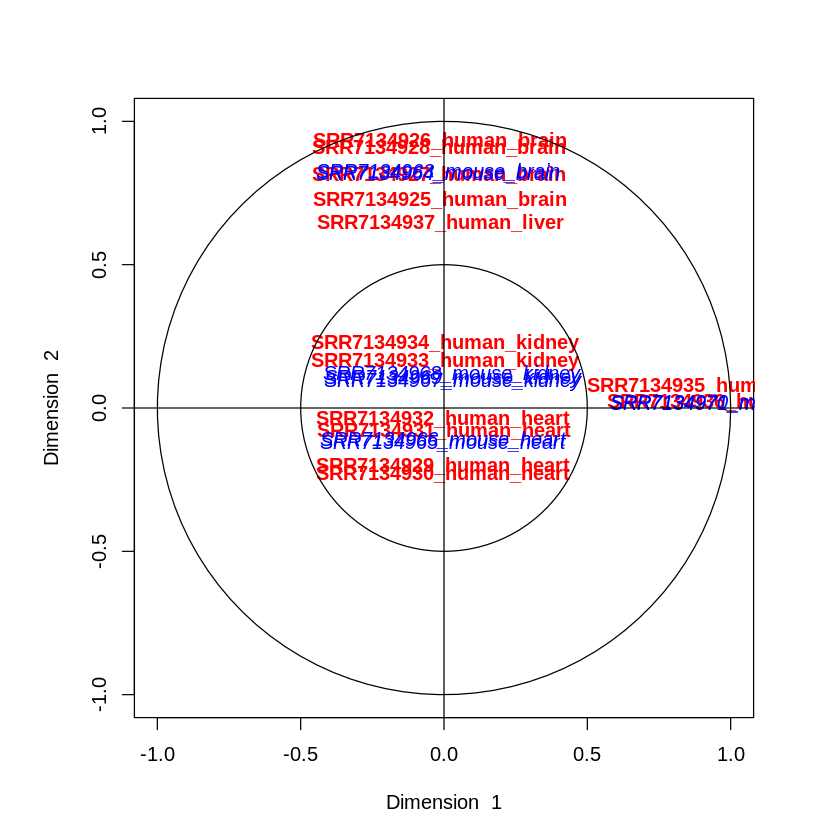

In [151]:
plt.cc(res.cc,type="v",var.label=T)

In [149]:
cc2 <- comput(df_s1, df_s2, cc1)
# display canonical loadings
cc2[3:6]

SRR7134925_human_brain,-0.014681206,0.72677860,0.16263471,0.292686047,-0.526719641,-0.01564512,-0.008181093,0.146428228,-0.204051801
SRR7134926_human_brain,-0.015380739,0.93129312,0.28690870,-0.024400392,0.025912717,-0.00676421,0.022558322,-0.052359762,0.127521861
SRR7134927_human_brain,-0.016553817,0.81261844,0.26453779,-0.191342130,0.427780654,0.07543469,-0.019293602,0.069911607,-0.155880353
SRR7134928_human_brain,-0.016402328,0.90629154,0.25483627,0.115548216,-0.228675726,0.01980160,-0.046790309,0.067682928,0.117018260
SRR7134929_human_heart,-0.003259245,-0.20368521,0.94715359,0.007384698,-0.044955574,-0.05177652,-0.052045245,0.009063646,0.046955239
SRR7134930_human_heart,-0.003464556,-0.23058129,0.90733586,0.058698938,-0.035153656,0.06816492,0.067460430,0.082800828,-0.014817398
SRR7134931_human_heart,-0.001522069,-0.08030031,0.47060236,-0.032757161,-0.037871428,-0.03819164,-0.018643630,0.019338326,0.186426661
SRR7134932_human_heart,-0.002587851,-0.03854131,0.30048443,-0.053734186,0.005445523,-0.48922071,-0.711014842,0.103179759,-0.110221384
SRR7134933_human_kidney,0.004075255,0.16295464,0.12549148,-0.765402519,-0.265918169,-0.07934271,0.134591304,0.491777430,0.075079211
SRR7134934_human_kidney,0.003439268,0.22606320,0.19198725,-0.824861387,-0.291746085,-0.27739144,0.142457827,-0.142938699,-0.077420016
SRR7134935_human_liver,0.929306720,0.07729638,0.03809708,-0.109334836,-0.142426682,0.23671826,-0.166282993,-0.100215203,-0.031399356


In [152]:
names(cc2)

[1] "xscores"        "yscores"        "corr.X.xscores" "corr.Y.xscores"
[5] "corr.X.yscores" "corr.Y.yscores"

In [153]:
head(cc2$xscores)

ENSG00000088766,0.05713811,-0.2577997,0.14352386,-0.03854085,-0.30838666,0.75476152,-0.47774002,-0.0170068,-0.005187548
ENSG00000010319,-0.03846236,-0.1513194,-0.09836582,-0.47560498,-0.17692821,-0.32653218,0.14441517,0.2166078,0.244113183
ENSG00000188338,0.17375025,-0.1354336,-0.14727302,-0.62266842,-0.74453423,2.97639980,-2.02801050,-0.8767784,0.114850134
ENSG00000134571,-0.13913006,-3.7593834,12.81426617,1.76791123,0.33510011,-6.60035420,-8.46300345,-1.5732730,3.811272848
ENSG00000174564,-0.03138035,-0.3578048,-0.23700572,0.32562615,0.05968547,-0.01555561,0.04254032,0.1316174,0.033717454
ENSG00000142627,-0.01929734,-0.3547306,-0.21637588,-0.08663908,-0.12941397,-0.06812513,0.02228887,0.3508957,0.093631834


In [154]:
names(cc1)

[1] "cor"    "names"  "xcoef"  "ycoef"  "scores"

In [155]:
cc1$cor

[1] 0.99274648 0.86485864 0.83174732 0.54613475 0.49994355 0.32181729 0.30569393
[8] 0.11382754 0.02547583

In [159]:
dim(cc1$xcoef)
cc1$xcoef

[1] 13  9

SRR7134925_human_brain,-5.595696e-08,3.378091e-05,-9.239029e-06,8.063880e-05,-1.191331e-04,-5.627168e-05,6.770925e-05,4.425615e-05,-3.366739e-04
SRR7134926_human_brain,-4.429545e-06,8.390136e-05,1.812443e-05,1.258482e-05,1.393966e-05,-7.649759e-05,1.041662e-04,-1.388034e-04,3.516160e-05
SRR7134927_human_brain,4.726533e-08,1.397576e-04,3.920281e-05,-1.582187e-04,5.511771e-04,1.955352e-04,-1.280258e-04,2.681523e-04,-6.366609e-04
SRR7134928_human_brain,3.973643e-06,9.711426e-05,4.877448e-05,3.519444e-05,-1.356908e-04,1.999878e-04,-4.178540e-04,2.340954e-04,1.376934e-03
SRR7134929_human_heart,-2.722674e-06,-6.808992e-05,3.084855e-04,2.634412e-05,4.280273e-06,-1.892537e-04,-2.120971e-04,-1.263234e-04,1.247998e-04
SRR7134930_human_heart,3.465584e-07,-2.707369e-05,5.336563e-05,1.343461e-05,-6.533386e-06,1.270216e-04,1.464751e-04,6.046555e-05,-8.432714e-05
SRR7134931_human_heart,1.411478e-07,1.431898e-05,-5.681893e-05,-4.992351e-06,1.748058e-06,-6.223327e-06,-3.310245e-06,6.519917e-06,6.331693e-05
SRR7134932_human_heart,-1.327662e-07,7.109912e-07,-1.719763e-06,-6.582675e-07,3.440964e-06,-4.116282e-05,-6.552979e-05,1.289831e-05,-1.132689e-05
SRR7134933_human_kidney,1.331663e-06,-3.082835e-06,-4.806580e-06,-9.692367e-05,-3.414899e-05,5.550002e-05,1.219539e-06,3.093755e-04,7.814072e-05
SRR7134934_human_kidney,-3.525508e-06,2.033353e-06,1.032989e-05,-2.339460e-04,-1.172773e-04,-2.138169e-04,1.331754e-04,-3.724978e-04,-1.365683e-04
SRR7134935_human_liver,-5.655577e-05,-1.691186e-05,5.636891e-06,-5.084743e-04,-4.467799e-04,1.601745e-03,-1.060869e-03,-5.300434e-04,-2.081554e-04


In [158]:
names(cc1$scores)

[1] "xscores"        "yscores"        "corr.X.xscores" "corr.Y.xscores"
[5] "corr.X.yscores" "corr.Y.yscores"

In [160]:
library(geigen)

ERROR: Error in library(geigen): there is no package called ‘geigen’


In [162]:
dim(df_s1)
dim(df_s2)

[1] 9529   13

[1] 9529    9

In [163]:
df_s1 = df_s1[complete.cases(df_s1),]
df_s2 = df_s2[complete.cases(df_s2),]
dim(df_s1)
dim(df_s2)

[1] 9529   13

[1] 9526    9

In [165]:
common = intersect(row.names(df_s1),row.names(df_s2))
df_s1 = df_s1[common,]
df_s2 = df_s2[common,]
dim(df_s1)
dim(df_s2)

[1] 9526   13

[1] 9526    9

In [167]:
t(df_s1)[1:3,1:3]

,ENSG00000088766,ENSG00000010319,ENSG00000188338
SRR7134925_human_brain,930,547,543
SRR7134926_human_brain,963,1034,1497
SRR7134927_human_brain,243,472,324


In [166]:
cc1 = cc(t(df_s1),t(df_s2))
plt.cc(cc1)

ERROR: Error in cov(X, Y, use = "pairwise"): incompatible dimensions
